This notebook is inspired on the notebook for the first assignment of the deep learning part of the AI master program of the University of Amsterdam. However, I made several changes to it (adjusting it to python 3, adding and deleting things etc.). The main purpose of the notebook is to check whether my own implementation of a neural network is correct and has the accuracy it should have.   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting configuration for matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 20

from feedforward_ANN.cifar10_utils import get_cifar10_raw_data, preprocess_cifar10_data
from feedforward_ANN.cifar10_utils import transform_label_encoding_to_one_hot
from feedforward_ANN.layer import LinearLayer, ReLuLayer, TanHLayer
from feedforward_ANN.network import Network
from feedforward_ANN.train import SGD
from feedforward_ANN.loss import SoftmaxCrossEntropyLoss
from feedforward_ANN.score import get_accuracy as get_accuracy2


In [2]:
X_train_raw, Y_train_raw, X_test_raw, Y_test_raw = get_cifar10_raw_data()

#Checking shapes, should be (50000, 32, 32, 3), (50000, ), (10000, 32, 32, 3), (10000, )
print('Train data shape: {}'.format(X_train_raw.shape))
print('Train labels shape: {}'.format(Y_train_raw.shape))
print('Test data shape: {}'.format(X_test_raw.shape))
print('Test labels shape: {}'.format(Y_test_raw.shape))
#Y_train_raw, Y_test_raw have values ranging from 0 to 9

Train data shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


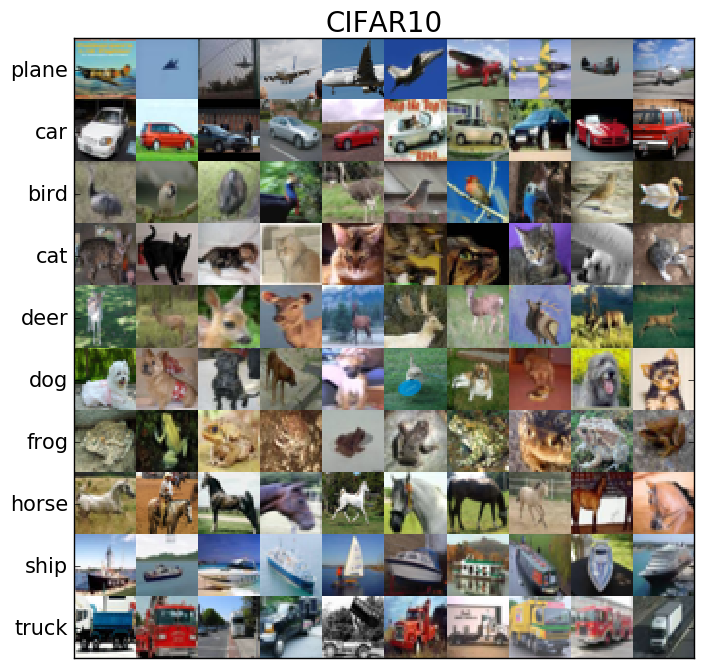

In [3]:
# Visualize CIFAR10 data
samples_per_class = 10
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num_classes = len(classes)
can = np.zeros((320, 320, 3),dtype='uint8')
for i, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train_raw == i) 
    idxs = np.random.choice(idxs, samples_per_class, replace = False)
    for j in range(samples_per_class):
        can[32 * i:32 * (i + 1), 32 * j:32 * (j + 1),:] = X_train_raw[idxs[j]]
plt.xticks([], [])
plt.yticks(range(16, 320, 32), classes)
plt.title('CIFAR10', fontsize = 20)
plt.imshow(can)
plt.show()

In [4]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = preprocess_cifar10_data(
    X_train_raw, Y_train_raw, X_test_raw, Y_test_raw, num_val = 1000
)

#Checking shapes, should be (49000, 3072), (49000, ), (1000, 3072), (1000, ), (10000, 3072), (10000, ) 
print('Train data shape: {}'.format(X_train.shape))
print('Train labels shape: {}'.format(Y_train.shape))
print('Val data shape: {}'.format(X_val.shape))
print('Val labels shape: {}'.format(Y_val.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(Y_test.shape))

num_classes = 10
Y_train_one_hot = transform_label_encoding_to_one_hot(Y_train, num_classes)
Y_val_one_hot = transform_label_encoding_to_one_hot(Y_val, num_classes)
Y_test_one_hot = transform_label_encoding_to_one_hot(Y_test, num_classes)

print('Train labels one hot shape: {}'.format(Y_train_one_hot.shape))
print('Val labels one hot shape: {}'.format(Y_val_one_hot.shape))
print('Test labels one hot shape: {}'.format(Y_test_one_hot.shape))


Train data shape: (49000, 3072)
Train labels shape: (49000,)
Val data shape: (1000, 3072)
Val labels shape: (1000,)
Test data shape: (10000, 3072)
Test labels shape: (10000,)
Train labels one hot shape: (49000, 10)
Val labels one hot shape: (1000, 10)
Test labels one hot shape: (10000, 10)


In [5]:

def get_accuracy(network, X, y):
    network.update_batch_size(1)
    correct_classified = 0
    for count in range(X.shape[0]):
        if np.argmax(network.forward(np.array([X[count]])))==y[count]:
            correct_classified += 1

    #print("the accuracy on the dataset is {}".format(correct_classified/X.shape[0]))
    network.update_batch_size(network.batch_size)
    return correct_classified/X.shape[0]

In [ ]:
# Default parameters. 
num_iterations = 25
val_iteration = 100
batch_size = 200
learning_rate = 1e-7
weight_decay = 3e+4
weight_scale = 0.0001
N = X_train[0].shape[0]

network = Network(batch_size, weight_decay, train_mode=True)
network.add_layer(LinearLayer(input_dim=N, output_dim=num_classes, 
                              batch_size=batch_size, weight_scale_w=weight_scale))
network.add_loss(SoftmaxCrossEntropyLoss())
sgd = SGD(network, X_train, Y_train_one_hot, batch_size)

accuracy = get_accuracy(network, X_val, Y_val)
for i in range(12):
    sgd.train(num_iterations, learning_rate)
    print(get_accuracy(network, X_val, Y_val))

    
"""
batch_data = get_batch_data()

z = network.forward(batch_data[0])
network.loss.compute_loss(z, batch_data[1])
network.backward()
dW = np.mean(network.layers[0].dW, axis=0)
print(dW[1,1])

delta = 0.0001

network.layers[0].W[0,0] += delta
z = network.forward(batch_data[0])
loss1 = network.loss.compute_loss(z, batch_data[1])

network.layers[0].W[0,0] -= 2*delta
z = network.forward(batch_data[0])
loss2 = network.loss.compute_loss(z, batch_data[1])

print(loss1)
print(loss2)

print((loss1-loss2) / (2*delta))
"""


In [ ]:
network.layers[0].data["batch_size"] = 1

correct_classified = 0
for count in range(X_val.shape[0]):
    if np.argmax(network.forward(np.array([X_val[count]])))==Y_val[count]:
        correct_classified += 1
        
print("the accuracy is {}".format(correct_classified/X_val.shape[0]))

Now try tuning the parameters to get the best results:

In [ ]:
# Default parameters. 
num_iterations = 50
val_iteration = 100
batch_size = 100
weight_scale = 0.0001
N = X_train[0].shape[0]

learning_rates = [1e-6, 5*1e-6, 1e-7, 5*1e-7, 1e-8]
weight_decays = np.linspace(0, 3e+04, 5)

best_val_acc = -1
best_solver = None
for learning_rate in learning_rates:
    for weight_decay in weight_decays:
        network = Network(batch_size, weight_decay, train_mode=True)
        network.add_layer(LinearLayer(input_dim=N, output_dim=num_classes, 
                          batch_size=100, weight_scale=weight_scale))
        network.add_loss(SoftmaxCrossEntropyLoss())
        sgd = SGD(network, X_train, Y_train_one_hot, batch_size)

        for i in range(10):
            sgd.train(num_iterations, learning_rate)
            accuracy = get_accuracy(network, X_val, Y_val)
        
        print(accuracy)
        print(best_val_acc)
        if best_val_acc < accuracy:
            best_val_acc = accuracy
            print("the best accuracy is now {:.4f}".format(accuracy))
            best_solver = (learning_rate, weight_decay)
        
print("Learning rate = {0:e}, weight decay = {1:e}: Validation Accuracy = {2:.3f}".format(
    learning_rate, weight_decay, cur_val_acc)
)    

########################################################################################
# TODO:                                                                                #
# Compute the accuracy on the test set for the best solver.                          #
########################################################################################
test_acc = None
########################################################################################
#                              END OF YOUR CODE                                        #
########################################################################################
print("Best Test Accuracy = {0:.3f}".format(test_acc))

Now try a multilayer ANN by adding 1 ReLu layer

In [6]:
# Default parameters. 
num_iterations = 25
val_iteration = 100
batch_size = 200
learning_rate = 2e-3
weight_decay = 0
weight_scale = 0.0001
num_hidden_units = 100

N = X_train[0].shape[0]

network = Network(batch_size, weight_decay, train_mode=True)
network.add_layer(
    LinearLayer(input_dim=N, output_dim=num_hidden_units, 
                batch_size=batch_size, weight_scale_w=weight_scale)
)

network.add_layer(ReLuLayer(num_hidden_units, batch_size))

network.add_layer(
    LinearLayer(input_dim=num_hidden_units, output_dim=num_classes, 
                batch_size=batch_size, weight_scale_w=weight_scale)
)

network.add_loss(SoftmaxCrossEntropyLoss())
sgd = SGD(network, X_train, Y_train_one_hot, batch_size)

accuracy = get_accuracy(network, X_val, Y_val)
for i in range(20):
    sgd.train(num_iterations, learning_rate)
    train_accuracy = get_accuracy(network, X_train, Y_train)
    print("the train accuracy is {}".format(train_accuracy))
    val_accuracy = get_accuracy(network, X_val, Y_val)
    print("the validation accuracy is {}".format(val_accuracy))
    print(get_accuracy2(network, X_val, Y_val))


the train accuracy is 0.22857142857142856
the validation accuracy is 0.234
0.234
the train accuracy is 0.3026530612244898
the validation accuracy is 0.318
0.318


KeyboardInterrupt: 